### 1. Importación de Librerias

In [1]:
#Importación de librerías Requeridas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np
import sys
import tensorflow as tf
import time
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.keras
from tensorflow.keras.callbacks import EarlyStopping
import shutil
import shap

c:\Users\higut\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 2. Lectura del data frame

In [3]:
file_path = 'banklimpio.csv'
df = pd.read_csv(file_path, sep=',')
df.shape

(77019, 84)

In [4]:
df

,periodo,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global,estu_edad,cole_area_ubicacion_URBANO,cole_bilingue_N,...,fami_personashogar_Tres,fami_personashogar_Una,fami_tieneautomovil_No,fami_tieneautomovil_Si,fami_tienecomputador_No,fami_tienecomputador_Si,fami_tieneinternet_No,fami_tieneinternet_Si,fami_tienelavadora_No,fami_tienelavadora_Si
0,20224,48.0,58.0,45.0,50.0,42.0,243.0,19,1,1,...,0,0,0,0,0,0,0,0,0,0
1,20224,52.0,47.0,33.0,43.0,53.0,223.0,20,1,1,...,0,0,1,0,0,1,0,1,0,1
2,20224,62.0,68.0,66.0,61.0,61.0,319.0,20,1,1,...,0,0,1,0,1,0,0,1,0,1
3,20224,58.0,44.0,37.0,45.0,45.0,220.0,19,1,1,...,0,0,1,0,1,0,1,0,1,0
4,20224,72.0,70.0,66.0,65.0,60.0,329.0,18,1,1,...,0,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77014,20142,48.0,52.0,45.0,50.0,57.0,254.0,26,1,1,...,0,0,1,0,1,0,1,0,1,0
77015,20142,52.0,62.0,52.0,51.0,65.0,285.0,25,1,1,...,1,0,1,0,1,0,0,1,1,0
77016,20172,38.0,42.0,29.0,44.0,32.0,184.0,25,1,1,...,0,0,1,0,0,1,0,1,0,1
77017,20194,37.0,41.0,32.0,40.0,46.0,198.0,24,1,1,...,0,0,1,0,1,0,1,0,1,0


### 3. Separación de los datos de entrenamiento y prueba

In [5]:
X = df.drop(columns=['punt_global', 'periodo', 'punt_ingles', 'punt_matematicas', 
                     'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica'])  # Variables explicativas
y = df['punt_global']  # Variable de respuesta

# Separar en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Verificación de las dimensiones para asegurarnos de que la separación fue correcta
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

Dimensiones de X_train: (61615, 77)
Dimensiones de X_test: (15404, 77)
Dimensiones de y_train: (61615,)
Dimensiones de y_test: (15404,)


### 4. Modelo

In [7]:
#Creación del experimento en mlflow
mlflow.set_experiment('Experimento con capas')

Traceback (most recent call last):
  File "c:\Users\higut\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\store\tracking\file_store.py", line 327, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\higut\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\store\tracking\file_store.py", line 421, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\higut\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1367, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\higut\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\store\tracking\file_store.py", line 13

<Experiment: artifact_location='file:///c:/Users/higut/Downloads/Proyecto3/Repositoriopro3/mlruns/368411137236315785', creation_time=1733228989176, experiment_id='368411137236315785', last_update_time=1733228989176, lifecycle_stage='active', name='Experimento con capas', tags={}>

#### Modelo con 10 capas: 1 de normalización, 1 de salida, 8 capas ocultas con 64  neuronas cada una

In [27]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001 #Tasa de aprendizaje
    epochs = 100  #Épocas
    Capas = 10  #Número de capas en el modelo
    Neuronas = 64  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    #capa de normalización
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))

    #Creación del modelo
    M1 = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(64, activation='relu'),#1
        tf.keras.layers.Dense(64, activation='relu'),#2
        tf.keras.layers.Dense(64, activation='relu'),#3
        tf.keras.layers.Dense(64, activation='relu'),#4
        tf.keras.layers.Dense(64, activation='relu'),#5
        tf.keras.layers.Dense(64, activation='relu'),#6
        tf.keras.layers.Dense(64, activation='relu'),#7
        tf.keras.layers.Dense(64, activation='relu'),#8
        tf.keras.layers.Dense(1)
      ])

    M1.compile(loss = 'mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.001))

    #EarlyStop para evitar el sobreajuste
    #early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

    #Registro del Earlystop si activa
    #if early_stop.stopped_epoch > 0:
    #    mlflow.log_param("Época de parada", early_stop.stopped_epoch)


    #Entrenamiento del modelo
    history = M1.fit(
      X_train,
      y_train,
      validation_split = 0.2,
      epochs = 100)
      #callbacks = [early_stop])
    
    #Registrar metricas
    mlflow.keras.log_model(M1, "Modelo1")

    #Predicciones sobre el conjunto de prueba
    Predicciones = M1.predict(X_test)

    #Calcular MSE y R2
    mse = mean_squared_error(y_test, Predicciones)
    r2 = r2_score(y_test, Predicciones)

    #Log de las métricas adicionales
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)
    
    #Evaluación en el conjunto de prueba
    loss = M1.evaluate(X_test, y_test)
    mlflow.log_metric("MAE", loss)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 56.3010 - val_loss: 33.8810
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 32.1035 - val_loss: 33.7490
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.7549 - val_loss: 32.0591
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.4042 - val_loss: 33.6052
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.3400 - val_loss: 34.9844
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.9340 - val_loss: 33.0071
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.0756 - val_loss: 33.6724
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.7425 - val_loss: 33.3040
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.6232 - val_loss: 31.5737
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.3791 - val_loss: 31.5657
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.4768 - val_loss: 33.0

2024/12/03 09:03:08 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 09:05:24 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\higut\AppData\Local\Temp\tmpbywhrwe6\model, flavor: keras). Fall back to return ['keras==3.5.0']. Set logging level to DEBUG to see the full traceback. 
2024/12/03 09:05:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33.2016


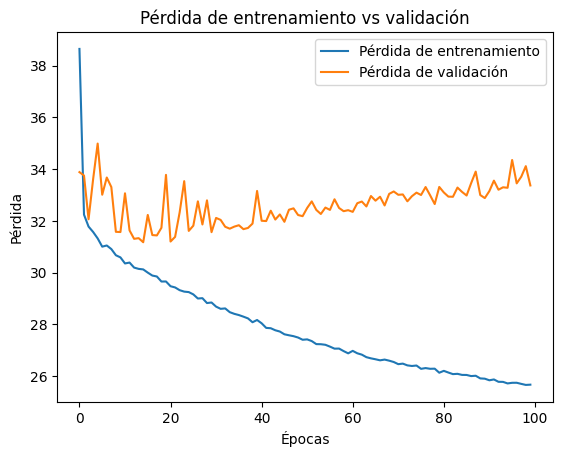

In [28]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


#### Modelo con 7 capas: 1 de normalización, 1 de salida, 5 capas ocultas con 64  neuronas cada una

In [29]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001 #Tasa de aprendizaje
    epochs = 100  #Épocas
    Capas = 7  #Número de capas en el modelo
    Neuronas = 64  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    #capa de normalización
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))

    #Creación del modelo
    M2 = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(64, activation='relu'),#1
        tf.keras.layers.Dense(64, activation='relu'),#2
        tf.keras.layers.Dense(64, activation='relu'),#3
        tf.keras.layers.Dense(1)
      ])

    M2.compile(loss = 'mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.001))

    #EarlyStop para evitar el sobreajuste
    #early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

    #Registro del Earlystop si activa
    #if early_stop.stopped_epoch > 0:
    #    mlflow.log_param("Época de parada", early_stop.stopped_epoch)


    #Entrenamiento del modelo
    history = M2.fit(
      X_train,
      y_train,
      validation_split = 0.2,
      epochs = 100)
    #  callbacks = [early_stop])
    
    #Registrar metricas
    mlflow.keras.log_model(M2, "Modelo2")

    #Predicciones sobre el conjunto de prueba
    Predicciones = M2.predict(X_test)

    #Calcular MSE y R2
    mse = mean_squared_error(y_test, Predicciones)
    r2 = r2_score(y_test, Predicciones)

    #Log de las métricas adicionales
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)
    
    #Evaluación en el conjunto de prueba
    loss = M2.evaluate(X_test, y_test)
    mlflow.log_metric("MAE", loss)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - loss: 71.1908 - val_loss: 32.4516
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.9152 - val_loss: 31.8715
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.3142 - val_loss: 32.1270
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 30.9077 - val_loss: 31.8725
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.7565 - val_loss: 31.8582
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.4398 - val_loss: 31.3604
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.4050 - val_loss: 31.5928
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.7262 - val_loss: 31.2852
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.2361 - val_loss: 31.1642
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.1853 - val_loss: 31.3155
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.0672 - val_loss: 31.4

2024/12/03 09:11:47 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 09:12:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32.8595


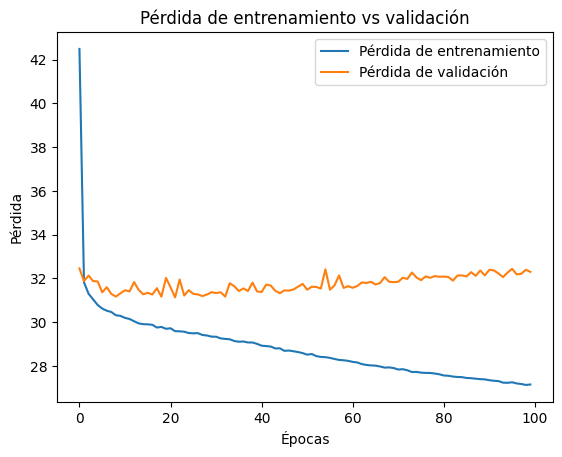

In [30]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [31]:
M1.save("ModeloUno.keras")
shutil.move("ModeloUno.keras", "C:/Users/higut/Downloads/Proyecto3/ModeloUno.keras")

'C:/Users/higut/Downloads/Proyecto3/ModeloUno.keras'

#### Modelo con 5 capas: 1 de normalización, 1 de salida, 3 capas ocultas con 64  neuronas cada una

In [32]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001 #Tasa de aprendizaje
    epochs = 100  #Épocas
    Capas = 5  #Número de capas en el modelo
    Neuronas = 64  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    #capa de normalización
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))

    #Creación del modelo
    M3 = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(64, activation='relu'),#1
        tf.keras.layers.Dense(64, activation='relu'),#2
        tf.keras.layers.Dense(64, activation='relu'),#3
        tf.keras.layers.Dense(1)
      ])

    M3.compile(loss = 'mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.001))

    #EarlyStop para evitar el sobreajuste
    #early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

    #Registro del Earlystop si activa
    #if early_stop.stopped_epoch > 0:
    #    mlflow.log_param("Época de parada", early_stop.stopped_epoch)


    #Entrenamiento del modelo
    history = M3.fit(
      X_train,
      y_train,
      validation_split = 0.2,
      epochs = 100)
    #  callbacks = [early_stop])
    
    #Registrar metricas
    mlflow.keras.log_model(M3, "Modelo3")

    #Predicciones sobre el conjunto de prueba
    Predicciones = M3.predict(X_test)

    #Calcular MSE y R2
    mse = mean_squared_error(y_test, Predicciones)
    r2 = r2_score(y_test, Predicciones)

    #Log de las métricas adicionales
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)
    
    #Evaluación en el conjunto de prueba
    loss = M3.evaluate(X_test, y_test)
    mlflow.log_metric("MAE", loss)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 68.4593 - val_loss: 32.4947
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.7944 - val_loss: 32.0457
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.1442 - val_loss: 32.2772
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.8281 - val_loss: 32.0052
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.5893 - val_loss: 31.9420
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.4682 - val_loss: 31.3801
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.5057 - val_loss: 31.5250
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.2588 - val_loss: 31.4952
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.1845 - val_loss: 31.4093
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 29.8775 - val_loss: 31.3755
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.1471 - val_loss: 31.49

2024/12/03 09:17:44 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 09:18:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32.4214


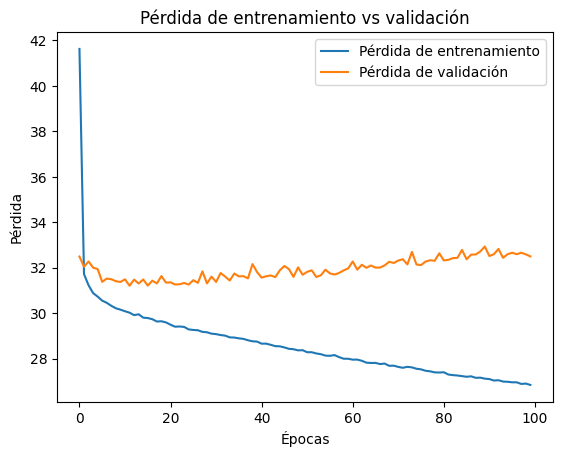

In [33]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### Modelo con 3 capas: 1 de normalización, 1 de salida, 1 capas ocultas con 64  neuronas cada una

In [34]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001 #Tasa de aprendizaje
    epochs = 100  #Épocas
    Capas = 3  #Número de capas en el modelo
    Neuronas = 64  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    #capa de normalización
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))

    #Creación del modelo
    M4 = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(64, activation='relu'),#1
        tf.keras.layers.Dense(1)
      ])

    M4.compile(loss = 'mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.001))

    #EarlyStop para evitar el sobreajuste
    #early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

    #Registro del Earlystop si activa
    #if early_stop.stopped_epoch > 0:
    #    mlflow.log_param("Época de parada", early_stop.stopped_epoch)


    #Entrenamiento del modelo
    history = M4.fit(
      X_train,
      y_train,
      validation_split = 0.2,
      epochs = 100)
    #  callbacks = [early_stop])
    
    #Registrar metricas
    mlflow.keras.log_model(M4, "Modelo4")

    #Predicciones sobre el conjunto de prueba
    Predicciones = M4.predict(X_test)

    #Calcular MSE y R2
    mse = mean_squared_error(y_test, Predicciones)
    r2 = r2_score(y_test, Predicciones)

    #Log de las métricas adicionales
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)
    
    #Evaluación en el conjunto de prueba
    loss = M4.evaluate(X_test, y_test)
    mlflow.log_metric("MAE", loss)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 178.8838 - val_loss: 45.4578
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 39.9663 - val_loss: 33.7718
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 32.7681 - val_loss: 32.3412
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 31.8841 - val_loss: 32.0064
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.2744 - val_loss: 31.7274
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 31.0358 - val_loss: 31.5673
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 30.8918 - val_loss: 31.3910
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.7272 - val_loss: 31.2951
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 30.6944 - val_loss: 31.2118
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 30.5258 - val_loss: 31.2412
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 30.2779 - val_loss: 31.1

2024/12/03 09:22:20 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 09:22:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - loss: 31.4315


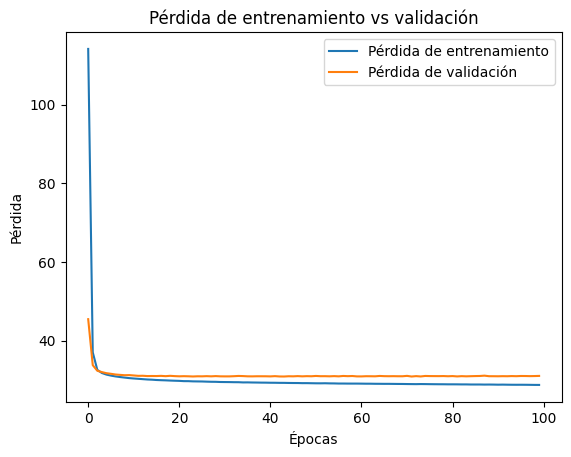

In [35]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### Modelo con 10 capas: 1 de normalización, 1 de salida, 8 capas ocultas con 100  neuronas cada una

In [36]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001 #Tasa de aprendizaje
    epochs = 100  #Épocas
    Capas = 10  #Número de capas en el modelo
    Neuronas = 100  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    #capa de normalización
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))

    #Creación del modelo
    M5 = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(100, activation='relu'),#1
        tf.keras.layers.Dense(100, activation='relu'),#2
        tf.keras.layers.Dense(100, activation='relu'),#3
        tf.keras.layers.Dense(100, activation='relu'),#4
        tf.keras.layers.Dense(100, activation='relu'),#5
        tf.keras.layers.Dense(100, activation='relu'),#6
        tf.keras.layers.Dense(100, activation='relu'),#7
        tf.keras.layers.Dense(100, activation='relu'),#8
        tf.keras.layers.Dense(1)
      ])

    M5.compile(loss = 'mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.001))

    #EarlyStop para evitar el sobreajuste
    #early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

    #Registro del Earlystop si activa
    #if early_stop.stopped_epoch > 0:
    #    mlflow.log_param("Época de parada", early_stop.stopped_epoch)


    #Entrenamiento del modelo
    history = M5.fit(
      X_train,
      y_train,
      validation_split = 0.2,
      epochs = 100)
      #callbacks = [early_stop])
    
    #Registrar metricas
    mlflow.keras.log_model(M5, "Modelo5")

    #Predicciones sobre el conjunto de prueba
    Predicciones = M5.predict(X_test)

    #Calcular MSE y R2
    mse = mean_squared_error(y_test, Predicciones)
    r2 = r2_score(y_test, Predicciones)

    #Log de las métricas adicionales
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)
    
    #Evaluación en el conjunto de prueba
    loss = M5.evaluate(X_test, y_test)
    mlflow.log_metric("MAE", loss)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 51.5828 - val_loss: 32.2736
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 32.4332 - val_loss: 31.8907
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 32.1546 - val_loss: 33.4140
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 31.6778 - val_loss: 31.8301
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 31.4883 - val_loss: 31.5366
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 30.9394 - val_loss: 32.6699
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 30.8866 - val_loss: 31.2502
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 30.7281 - val_loss: 30.9942
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 30.3724 - val_loss: 31.1797
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 30.2135 - val_loss: 30.9417
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 30.1360 - val_loss: 32.2

2024/12/03 09:31:00 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 09:32:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 34.8823


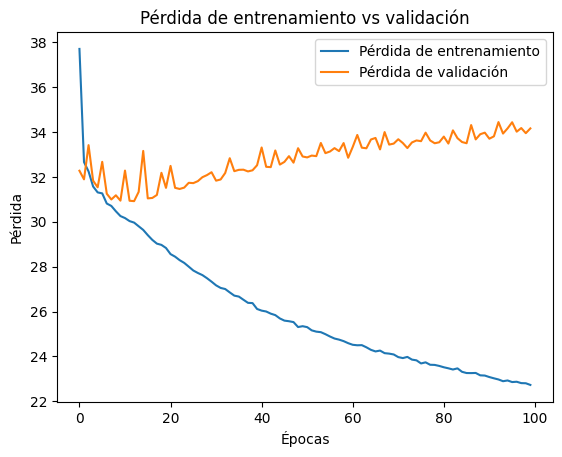

In [37]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### Modelo con 7 capas: 1 de normalización, 1 de salida, 5 capas ocultas con 100  neuronas cada una

In [38]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001 #Tasa de aprendizaje
    epochs = 100  #Épocas
    Capas = 7  #Número de capas en el modelo
    Neuronas = 100  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    #capa de normalización
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))

    #Creación del modelo
    M6 = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(100, activation='relu'),#1
        tf.keras.layers.Dense(100, activation='relu'),#2
        tf.keras.layers.Dense(100, activation='relu'),#3
        tf.keras.layers.Dense(100, activation='relu'),#4
        tf.keras.layers.Dense(100, activation='relu'),#5
        tf.keras.layers.Dense(1)
      ])

    M6.compile(loss = 'mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.001))

    #EarlyStop para evitar el sobreajuste
    #early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

    #Registro del Earlystop si activa
    #if early_stop.stopped_epoch > 0:
    #    mlflow.log_param("Época de parada", early_stop.stopped_epoch)


    #Entrenamiento del modelo
    history = M6.fit(
      X_train,
      y_train,
      validation_split = 0.2,
      epochs = 100)
      #callbacks = [early_stop])
    
    #Registrar metricas
    mlflow.keras.log_model(M6, "Modelo6")

    #Predicciones sobre el conjunto de prueba
    Predicciones = M6.predict(X_test)

    #Calcular MSE y R2
    mse = mean_squared_error(y_test, Predicciones)
    r2 = r2_score(y_test, Predicciones)

    #Log de las métricas adicionales
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)
    
    #Evaluación en el conjunto de prueba
    loss = M6.evaluate(X_test, y_test)
    mlflow.log_metric("MAE", loss)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 54.8093 - val_loss: 32.1613
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 32.3044 - val_loss: 33.1523
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 31.6721 - val_loss: 31.7378
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 31.0585 - val_loss: 31.5396
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 30.9412 - val_loss: 31.6185
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 30.6620 - val_loss: 31.4470
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 30.4570 - val_loss: 31.3395
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 30.2452 - val_loss: 31.3420
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 29.9702 - val_loss: 32.5390
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 29.8828 - val_loss: 32.3316
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 29.8770 - val_loss: 32.9

2024/12/03 09:39:43 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 09:40:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34.2534


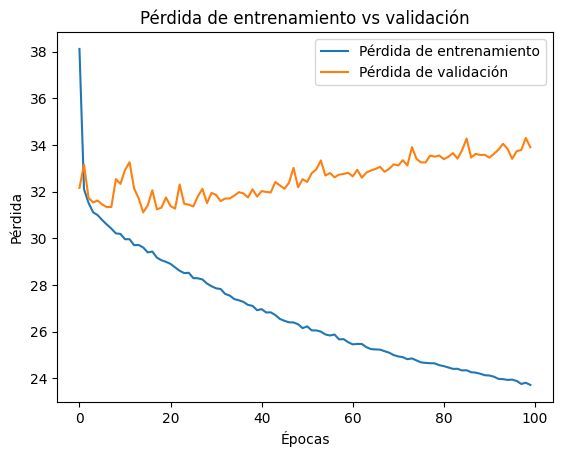

In [39]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### Modelo con 3 capas: 1 de normalización, 1 de salida, 1 capas ocultas con 100  neuronas cada una

In [8]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001 #Tasa de aprendizaje
    epochs = 100  #Épocas
    Capas = 3  #Número de capas en el modelo
    Neuronas = 100  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    #capa de normalización
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))

    #Creación del modelo
    M7 = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(100, activation='relu'),#1
        tf.keras.layers.Dense(1)
      ])

    M7.compile(loss = 'mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.001))

    #EarlyStop para evitar el sobreajuste
    #early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

    #Registro del Earlystop si activa
    #if early_stop.stopped_epoch > 0:
    #    mlflow.log_param("Época de parada", early_stop.stopped_epoch)


    #Entrenamiento del modelo
    history = M7.fit(
      X_train,
      y_train,
      validation_split = 0.2,
      epochs = 100)
      #callbacks = [early_stop])
    
    #Registrar metricas
    mlflow.keras.log_model(M7, "Modelo7")

    #Predicciones sobre el conjunto de prueba
    Predicciones = M7.predict(X_test)

    #Calcular MSE y R2
    mse = mean_squared_error(y_test, Predicciones)
    r2 = r2_score(y_test, Predicciones)

    #Log de las métricas adicionales
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)
    
    #Evaluación en el conjunto de prueba
    loss = M7.evaluate(X_test, y_test)
    mlflow.log_metric("MAE", loss)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 157.2907 - val_loss: 37.7927
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 35.1217 - val_loss: 32.4384
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 32.0183 - val_loss: 31.6320
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.3327 - val_loss: 31.5398
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.9804 - val_loss: 31.3259
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 30.7925 - val_loss: 31.0799
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 30.5699 - val_loss: 31.0909
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 30.1811 - val_loss: 31.0823
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.2080 - val_loss: 30.9476
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.1150 - val_loss: 31.0265
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 30.3877 - val_loss: 30.

2024/12/03 19:25:44 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 19:28:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 31.3496


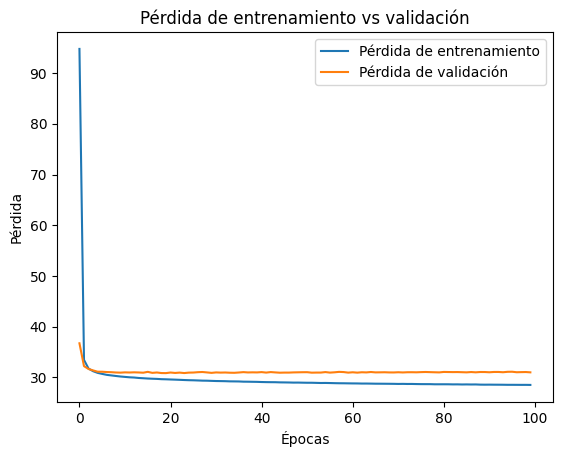

In [41]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### Modelo con 10 capas: 1 de normalización, 1 de salida, 8 capas ocultas con 28 neuronas cada una

In [42]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001 #Tasa de aprendizaje
    epochs = 100  #Épocas
    Capas = 10  #Número de capas en el modelo
    Neuronas = 28  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    #capa de normalización
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))

    #Creación del modelo
    M8 = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(28, activation='relu'),#1
        tf.keras.layers.Dense(28, activation='relu'),#2
        tf.keras.layers.Dense(28, activation='relu'),#3
        tf.keras.layers.Dense(28, activation='relu'),#4
        tf.keras.layers.Dense(28, activation='relu'),#5
        tf.keras.layers.Dense(28, activation='relu'),#6
        tf.keras.layers.Dense(28, activation='relu'),#7
        tf.keras.layers.Dense(28, activation='relu'),#8
        tf.keras.layers.Dense(1)
      ])

    M8.compile(loss = 'mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.001))

    #EarlyStop para evitar el sobreajuste
    #early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

    #Registro del Earlystop si activa
    #if early_stop.stopped_epoch > 0:
    #    mlflow.log_param("Época de parada", early_stop.stopped_epoch)


    #Entrenamiento del modelo
    history = M8.fit(
      X_train,
      y_train,
      validation_split = 0.2,
      epochs = 100)
      #callbacks = [early_stop])
    
    #Registrar metricas
    mlflow.keras.log_model(M8, "Modelo8")

    #Predicciones sobre el conjunto de prueba
    Predicciones = M8.predict(X_test)

    #Calcular MSE y R2
    mse = mean_squared_error(y_test, Predicciones)
    r2 = r2_score(y_test, Predicciones)

    #Log de las métricas adicionales
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)
    
    #Evaluación en el conjunto de prueba
    loss = M8.evaluate(X_test, y_test)
    mlflow.log_metric("MAE", loss)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 71.1251 - val_loss: 32.5398
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 32.5663 - val_loss: 31.8674
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.6186 - val_loss: 31.3690
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 31.2180 - val_loss: 31.3387
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 31.1274 - val_loss: 31.1147
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.7875 - val_loss: 31.0787
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.6270 - val_loss: 31.3219
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 30.5421 - val_loss: 31.1358
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.6610 - val_loss: 31.7856
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.3000 - val_loss: 31.2968
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 30.1899 - val_loss: 32.3

2024/12/03 09:52:53 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 09:53:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - loss: 32.0989


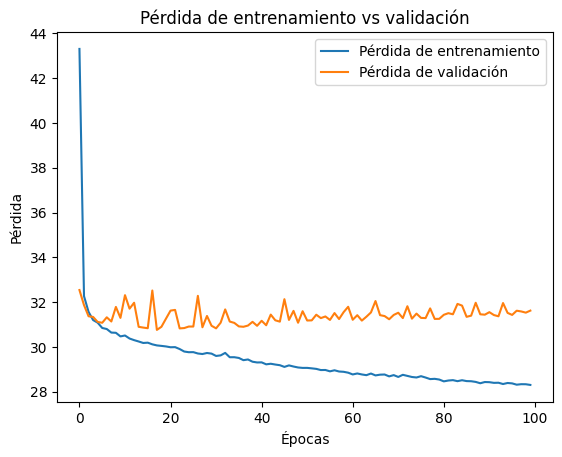

In [43]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### Modelo con 7 capas: 1 de normalización, 1 de salida, 5 capas ocultas con 28 neuronas cada una

In [44]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001 #Tasa de aprendizaje
    epochs = 100  #Épocas
    Capas = 7  #Número de capas en el modelo
    Neuronas = 28  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    #capa de normalización
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))

    #Creación del modelo
    M9 = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(28, activation='relu'),#1
        tf.keras.layers.Dense(28, activation='relu'),#2
        tf.keras.layers.Dense(28, activation='relu'),#3
        tf.keras.layers.Dense(28, activation='relu'),#4
        tf.keras.layers.Dense(1)
      ])

    M9.compile(loss = 'mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.001))

    #EarlyStop para evitar el sobreajuste
    #early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

    #Registro del Earlystop si activa
    #if early_stop.stopped_epoch > 0:
    #    mlflow.log_param("Época de parada", early_stop.stopped_epoch)


    #Entrenamiento del modelo
    history = M9.fit(
      X_train,
      y_train,
      validation_split = 0.2,
      epochs = 100)
      #callbacks = [early_stop])
    
    #Registrar metricas
    mlflow.keras.log_model(M9, "Modelo9")

    #Predicciones sobre el conjunto de prueba
    Predicciones = M9.predict(X_test)

    #Calcular MSE y R2
    mse = mean_squared_error(y_test, Predicciones)
    r2 = r2_score(y_test, Predicciones)

    #Log de las métricas adicionales
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)
    
    #Evaluación en el conjunto de prueba
    loss = M9.evaluate(X_test, y_test)
    mlflow.log_metric("MAE", loss)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 81.3253 - val_loss: 32.8871
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 32.5610 - val_loss: 32.2832
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.6469 - val_loss: 31.8592
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.2881 - val_loss: 31.6786
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.1653 - val_loss: 32.3846
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.9511 - val_loss: 31.4517
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.7644 - val_loss: 31.5382
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.7533 - val_loss: 31.4589
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.6656 - val_loss: 31.6218
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.5384 - val_loss: 31.1484
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30.5280 - val_loss: 31.49

2024/12/03 09:58:34 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 09:58:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 31.7618


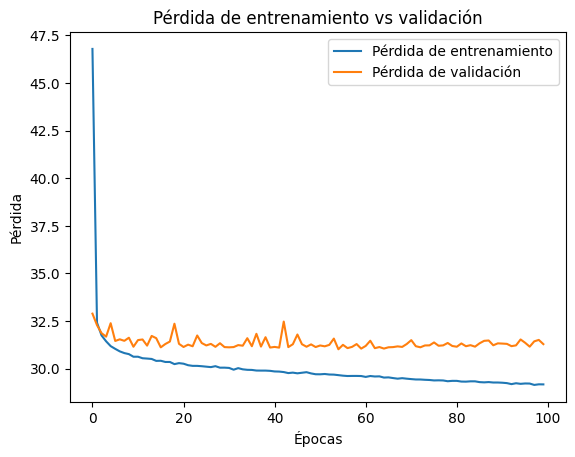

In [45]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### Modelo con 3 capas: 1 de normalización, 1 de salida, 1 capas ocultas con 28 neuronas cada una

In [46]:
with mlflow.start_run():  # Iniciar el seguimiento de un experimento

    # Definir los hiperparámetros del modelo
    learning_rate = 0.001 #Tasa de aprendizaje
    epochs = 100  #Épocas
    Capas = 3  #Número de capas en el modelo
    Neuronas = 28  # Número de neuronas por capa
    
    # Registrar los hiperparámetros
    mlflow.log_param("learning_rate", learning_rate)
    mlflow.log_param("epochs", epochs)
    mlflow.log_param("Capas", Capas)
    mlflow.log_param("Neuronas", Neuronas)

    #capa de normalización
    norm = tf.keras.layers.Normalization()
    norm.adapt(np.array(X_train))

    #Creación del modelo
    M10 = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(28, activation='relu'),#1
        tf.keras.layers.Dense(1)
      ])

    M10.compile(loss = 'mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.001))

    #EarlyStop para evitar el sobreajuste
    #early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

    #Registro del Earlystop si activa
    #if early_stop.stopped_epoch > 0:
    #    mlflow.log_param("Época de parada", early_stop.stopped_epoch)


    #Entrenamiento del modelo
    history = M10.fit(
      X_train,
      y_train,
      validation_split = 0.2,
      epochs = 100)
      #callbacks = [early_stop])
    
    #Registrar metricas
    mlflow.keras.log_model(M10, "Modelo10")

    #Predicciones sobre el conjunto de prueba
    Predicciones = M10.predict(X_test)

    #Calcular MSE y R2
    mse = mean_squared_error(y_test, Predicciones)
    r2 = r2_score(y_test, Predicciones)

    #Log de las métricas adicionales
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("R2", r2)
    
    #Evaluación en el conjunto de prueba
    loss = M10.evaluate(X_test, y_test)
    mlflow.log_metric("MAE", loss)

Epoch 1/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 205.6490 - val_loss: 60.3822
Epoch 2/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 52.7816 - val_loss: 41.3962
Epoch 3/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 38.7214 - val_loss: 35.1749
Epoch 4/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 34.3620 - val_loss: 33.5571
Epoch 5/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 33.0100 - val_loss: 32.8064
Epoch 6/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 32.4065 - val_loss: 32.5039
Epoch 7/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.8803 - val_loss: 32.2325
Epoch 8/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 31.7813 - val_loss: 32.0166
Epoch 9/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 31.4304 - val_loss: 31.8910
Epoch 10/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 31.2749 - val_loss: 31.7372
Epoch 11/100
1541/1541 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 31.1706 - val_loss: 31.6

2024/12/03 10:04:32 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 10:05:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 31.2824


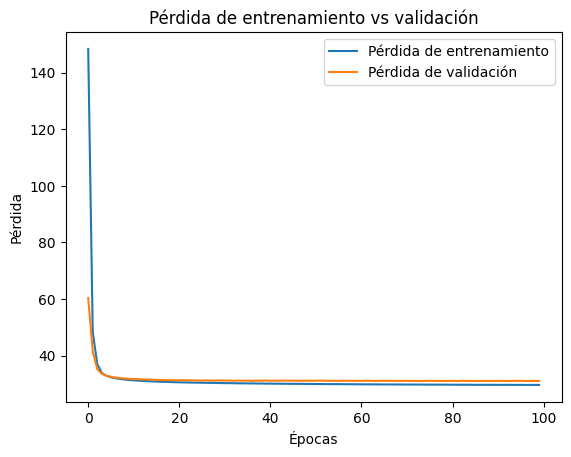

In [47]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida de entrenamiento vs validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### Mejor Modelo

In [48]:
M7.save("ModeloFinal.keras")
shutil.move("ModeloFinal.keras", "C:/Users/higut/Downloads/Proyecto3/ModeloFinal")

'C:/Users/higut/Downloads/Proyecto3/ModeloFinal'

PermutationExplainer explainer: 15405it [23:56, 10.72it/s]                            


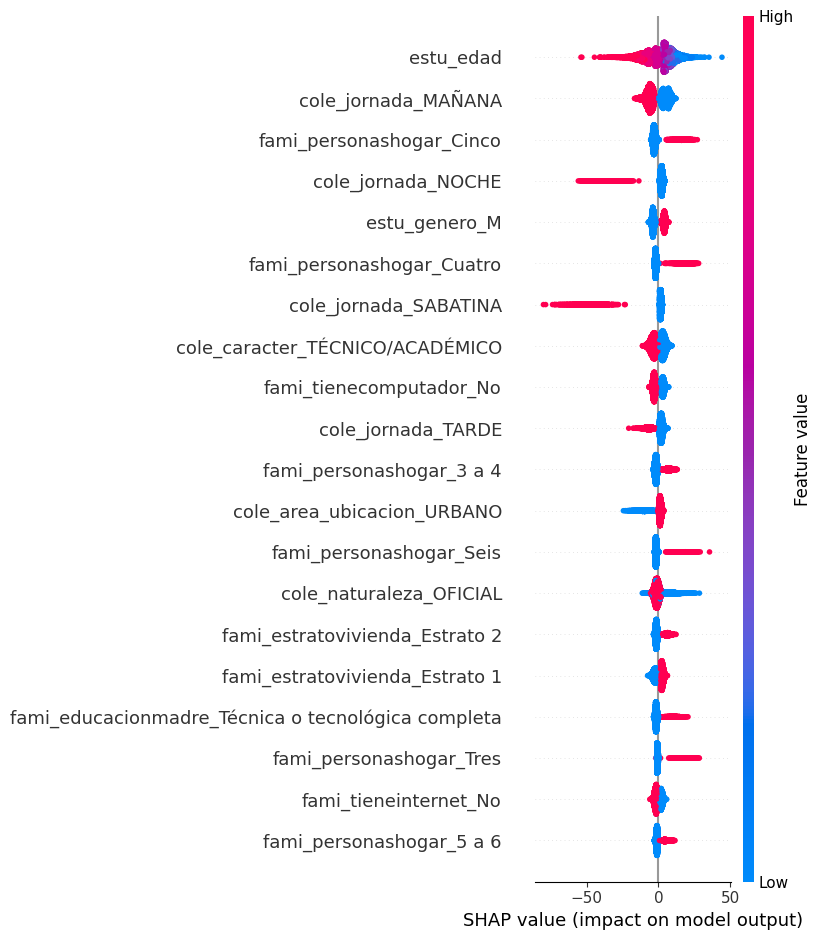

In [9]:
explainer = shap.Explainer(M7, X_train[:100])
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)